<img src="images/bannerugentdwengo.png" alt="Banner" style="width: 150px;"/>

<div style='color: #690027;' markdown="1">
<h1>DEEP LEARNING MODEL FOR SENTIMENT ANALYSIS</h1></div>

<div class="alert alert-box alert-success">
In this notebook, you are working on a concrete application of sentiment analysis. You make use of a dataset of movie reviews to train a <em>machine learning</em> algorithm that decides whether a movie review is positive or negative.<br>Such a machine learning algorithm searches for patterns in large amounts of data. Based on these patterns, the algorithm can then make a decision.</div>

In the previous two notebooks on sentiment analysis, the sentiment of a review is determined based on known patterns (the polarities of the words in the review - these polarities can be found in a lexicon). On the basis of these polarities, it is decided whether a review has a positive or negative sentiment. <br>In this notebook, you will use machine learning to teach the computer to recognize the polarity of a review, based solely on a large dataset with labeled reviews. More specifically: you will use a deep learning model, which is a machine learning model that consists of contiguous layers.

### Import ModulesIn addition to the known modules pandas, NumPy and Matplotlib, the code in this notebook also uses the Python module NLTK, which stands for Natural Language Toolkit, and Keras, scikit-learn and Tensorflow to be able to set up a deep learning system.

In [1]:
# import modules
import pandas as pdimport numpy as npimport nltkfrom nltk.corpus import stopwords
import matplotlib.pyplot as plt
import mpld3mpld3.enable_notebook()plt.rcParams['figure.figsize'] = [9.5, 6]
from numpy import arrayfrom tensorflow.keras.preprocessing.text import one_hotfrom tensorflow.keras.models import Sequentialfrom tensorflow.keras.layers import Activation, Dropout, Densefrom tensorflow.keras.layers import Flattenfrom tensorflow.keras.layers import GlobalMaxPooling1Dfrom tensorflow.keras import layersfrom tensorflow.keras.layers import Embeddingfrom sklearn.model_selection import train_test_splitfrom tensorflow.keras import regularizersfrom tensorflow.keras import backend as Kfrom tensorflow.keras.callbacks import ModelCheckpointfrom tensorflow.keras.utils import plot_model
from sentiment_helpers import prepare_for_prediction, train_model, set_up_deeplearning_model, convert_polarities_to_numbers, clean_up_dataset, create_bar_diagram_polarities, process_input_data, remove_html, replace_punctuation, remove_single_characters, remove_multiple_spaces
from bar_chart import create_bar_chart_polarities

<div style='color: #690027;' markdown="1">
    <h2>1. The dataset</h2></div>

First you read a dataset of movie reviews in [1].This dataset consists of a large table with two columns. On each row, in the first column, you can find the text of the review, and in the second column it states whether the review is positive or negative (the sentiment).

In [2]:
# Read dataset from a csv filereviews = pd.read_csv("data/imdbdataset.csv")
# show first 5 reviewsreviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# convert to NumPy-arrayreviews = np.array(reviews)
# show first 10 reviewsprint(reviews[0:10])

[["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the 

You know the number of reviews when you look at the 'shape' of the dataset. Based on the following instruction, you can request the `shape` attribute of the Numpy-array: `reviews.shape`.

In [21]:
print(reviews.shape)

(50000, 2)


The dataset has 50,000 rows and 2 columns. So it contains 50,000 reviews along with their corresponding polarity.

It is always interesting to take a closer look at the dataset used before you start coding a machine learning algorithm. Take a closer look at some reviews.

In [23]:
# show text of 1025th reviewprint("Review 1025:")print(reviews[1024, 0])      # first column of review with index 1024

Review 1025:
This is a good time to say how good I think of this site: it gives me the opportunity to feedback all the frustration I lived for two hours, awaiting for something to happens, for something to be said, to be shown, to be insinuated subtly, for a symbol, an idea, whatever. No, just long, endless violins, alternated by a tired piano. Tired voices, tired actors and bored characters and situations. Boring is the long death of the mind, and this movie is, from that point of view, a public enemy. How many thousands of live hours will be still stolen to another thousands of innocent spectators. I don't claim for my money back, just for my time and the time of persons I invited to watch this thing... oh God !


In [24]:
# show text of 2049th reviewprint("Review 2049:")print(reviews[2048, 0])

Review 2049:
I have always loved The Muppets. Though most children's entertainment then wasn't that likable, The Muppet's was. The Muppet's are very, very funny. They are probably the most likable children's characters ever. <br /><br />Not only did The Muppets have their own show. They also have starred in many films. from The Muppet's Christmas carol to The Muppet's treasure Island. The first Muppet's movie, The Muppet movie, was also, like the show and the other films, excellent.<br /><br />The Muppet movie is about how they all got started. Kermit the frog used to live in a swamp. Until one day a movie executive tells him that there are auditions for frogs in Hollywood. So Kermit takes off for Hollywood. Along the way he runs into lots of people such as Fozzie Bear, Gonzo the great, and Miss Piggy. Also, an evil man is trying to capture Kermit.<br /><br />All of the Muppet films are highly enjoyable. I mean they are all very funny. This film has many film appearances. Such as Steve

### Assignment 1.1- Thoroughly read the above reviews.- Can you determine whether the sentiment is positive or negative from both reviews?

In [25]:
# display sentiment of reviews with indices 1024 and 2048print("Sentiment of review 1025: ", reviews[1024, 1])               # second column of review with index 1024print("Sentiment of review 2049: ", reviews[2048, 1])

Sentiment van review 1025:  negative
Sentiment van review 2049:  positive


- Does your idea match what is given in the dataset?

In machine learning, it is important that the dataset you are working with is more or less balanced. This means that you should have approximately the same number of examples with a positive as a negative sentiment.<br>You can easily visualize the distribution with the following code:

In [4]:
# check which different polarities occur in the dataset and count how many timespolarities, frequencies = np.unique(reviews[:,1], return_counts=True)print(polarities, frequencies)
# show how many times each label appearsprint("Polarity " + "'" + str(polarities[0]) + "'" + " occurs " + str(frequencies[0]) + " times.")print("Polarity " + "'" + str(polarities[1]) + "'" + " occurs " + str(frequencies[1]) + " times.")

['negative' 'positive'] [25000 25000]
Polariteit 'negative' komt 25000 keer voor.
Polariteit 'positive' komt 25000 keer voor.


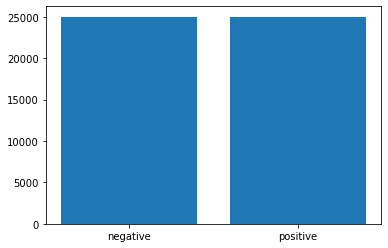

In [6]:
# visualize distribution in bar chartcreate_bar_chart_polarities(polarities, frequencies)

You can see that the dataset is perfectly balanced.

<div style='color: #690027;' markdown="1">
<h2>2. Preprocessing the data</h2></div>

### Preprocessing

<div class="alert alert-box alert-info">
As you could see before, there are strange code tags like <span style="background-color:whitesmoke; font-family:consolas; font-size:1em;">br /</span> in some reviews. This is because the reviews are clipped from the source code of an HTML page. Before you can train the algorithm, you must first remove these tags.</div>    

In [7]:
# the following function applies cleanup rules to given textdef clean_text(text):    tekst = remove_html(tekst)                        # remove all HTML elements from teksttext = replace_punctuation(text)                    # replace all punctuation marks with spacestext = remove_singular_characters(text)      # remove all singular lettersclean_text = remove_multiple_spaces(text) # replace multiple spaces with one spacereturn clean_text

We can now clean up the text of a review by applying the `tekst_opschonen()` function to one of the reviews. The code below shows the cleaned up version of the review with index 2048. Do you see the difference with how the text of that review looked above?

In [8]:
# display cleaned text of review with index 2048print(clean_text(reviews[2048, 0]))

NameError: name 'verwijder_html' is not defined

Now that you have a function to remove unwanted characters from the reviews, you can apply it to the dataset. The following code cleans up all the reviews in the dataset. This code is not so easy to understand. So don't get caught up in it.

In [10]:
# apply cleanup function to each review in datasetreviews[:, 0] = clean_dataset_up(reviews)            # texts are in the first column of 'reviews'

Check if this succeeded by looking at the text of the 2049th review again:

In [11]:
# Print the text of review 2048 again.print('Review 2048:')print(reviews[2048, 0])

Review 2048:
I have always loved The Muppets Though most children entertainment then wasn that likable The Muppet was The Muppet are very very funny They are probably the most likable children characters ever Not only did The Muppets have their own show They also have starred in many films from The Muppet Christmas carol to The Muppet treasure Island The first Muppet movie The Muppet movie was also like the show and the other films excellent The Muppet movie is about how they all got started Kermit the frog used to live in swamp Until one day movie executive tells him that there are auditions for frogs in Hollywood So Kermit takes off for Hollywood Along the way he runs into lots of people such as Fozzie Bear Gonzo the great and Miss Piggy Also an evil man is trying to capture Kermit All of the Muppet films are highly enjoyable mean they are all very funny This film has many film appearances Such as Steve Martin Mel Brooks Elliot Gould Carol Kane Richard Pryor and Orson Welles The Mupp

In [9]:
print(reviews[2048, 1])

positive


The label is unchanged.

The text of the reviews is now in a format that you can use for the <em>machine learning-</em> algorithm. However, you still need to convert the polarities to a format that the algorithm understands. The algorithm always represents the output values as numbers. Consequently, you need to convert the 'positive' and 'negative' polarities that appear in the dataset into numbers. <br>The code below converts 'positive' into a 1 and 'negative' into a 0.

In [10]:
# change 'positive' to 1 and 'negative' to 0reviews[:, 1] = convert_polarities_to_numbers(reviews)

NameError: name 'zet_polariteiten_om_naar_getallen' is not defined

Check the labels of the reviews with indices 1024 and 2048 again. These should now be numbers instead of text.

In [11]:
print("Sentiment of review 1024: ", reviews[1024, 1])print("Sentiment of review 2048: ", reviews[2048, 1])

Sentiment van review 1024:  negative
Sentiment van review 2048:  positive


So, now the dataset is in the format required to train the <em>machine learning-</em> algorithm. In the next part, you will look in more detail at how the algorithm works and how you can use it to perform sentiment analysis.

<div style='color: #690027;' markdown="1">
<h2>3. Machine learning</h2></div>

<div style='color: #690027;' markdown="1">
<h3>3.1 The training and validation collection</h3></div>

Machine learning, or machine learning (ML) uses algorithms that, based on large amounts of data, can recognize patterns and make decisions based on those patterns. <br>To train these algorithms efficiently, it's best to start with a dataset that consists of two components: a <b>training set</b> and a <b>validation set</b>. These two collections are both subsets of the full dataset, and they are disjoint. Usually, the training set contains more data than the validation set.<br>Below you can find more information about the two collections:
<ul>
<li>Based on the <b>training set</b>, the algorithm searches for patterns that provide information about what you want to predict, thus the algorithm independently learns to recognize patterns. Possible patterns are for instance the number of letters in the text, the number of articles in the text but also whether certain words, like 'fun' or 'hate', occur or not. Some patterns, like the number of times the word 'fun' is used, tell more about the polarity than others, such as the number of times the letter 'e' appears in the text. The algorithm looks for the patterns that can best be used to predict the sentiment.</li><li>The <b>validation set</b> tests whether the algorithm can also predict the sentiment of reviews it has not previously seen during the learning process. This is necessary because, for example, you don't want the algorithm to just 'memorize' the dataset. In other words: you don't want the algorithm to just know that the exact text of the review with index 2048 is positive without recognizing patterns in the text. If you were to change one letter in the text in that case, the algorithm would no longer be able to make a correct prediction.</li></ul>

For this application, you split the dataset into a training set that contains 80% of the reviews and a validation set that consists of the remaining 20%.

<div>
In addition to splitting into training and test collections, you also consider the review texts (X_...) separately from the labels (y_...).<br>Below you see a visual representation of the split:<img src="images/ChatbotSentiment/train_test_split.svg" alt="Banner" align="center" style="width:900px;"/>
</div>

The following code splits the data:

In [12]:
# splits dataset into training set and validation setX_train, X_val, y_train, y_val = train_test_split(reviews[:,0], reviews[:,1], test_size=0.20, random_state=31)

NameError: name 'train_test_split' is not defined

Because the *machine learning* algorithm struggles with a training set where the elements have different lengths (a different number of words), the input data is structured a bit differently.<br>To do this, you establish:- how many different words may appear in all reviews;- how many words a review may have maximum.Based on these two values, you adjust the reviews:- Always keep the 5000 most common words and remove all other words from the reviews.- For each review, determine how many words it still contains.- If the review contains less than 100 words, you keep all the words; if it contains more than 100 words, you remove the last words from the review.

In [15]:
maximum_number_of_words = 5000maximum_sentence_length = 100X_train, X_val, y_train, y_val = process_input_data(X_train, X_val, y_train, y_val, maxlen=maximum_sentence_length, maxwords=maximum_number_of_words)

<div style='color: #690027;' markdown="1">
<h3>3.2 The deep learning model</h3></div>

The data is now fully prepared to serve as input for a <em>machine learning</em> algorithm. The used algorithm falls under the category of <em>deep neural networks</em>. <em>Deep neural networks</em> consist of multiple layers, each of these layers performs a operation on the output of the previous layer. The model that you are using here, consists of three layers:
<ol>
<li>The first layer aims to convert similar words into similar features. Examples of possible features are: the number of letters in the word, the number of capital letters in the word, or the number of times the letter 'e' appears.If you apply this conversion to properties on a few simple words, you get the following result:        <ul>
<li>'the' -> 'number of letters': 3, 'number of print letters': 0, 'number of times letter e': 1</li><li>'CARNIVAL PARADE' -> 'number of letters': 16, 'number of capital letters': 16, 'number of times letter e': 0</li><li>'one' -> 'number of letters': 3, 'number of print letters': 0, 'number of times letter e': 2</li>        </ul>
This example clearly shows that the words 'the' and 'a' have more similar properties than the words 'the' and 'CARNIVAL PARADE'. This example illustrates the principle, but <strong>in practice we do not know which properties the first layer will use correctly</strong>. The algorithm will learn to choose the properties that provide the most information about the word's sentiment.    </li>
<li>The second layer combines the properties from the first layer for each review into a group of properties for the entire sentence. If the sentence were 'a CARNAVAL PROCESSION', then the result of the second layer would be: 3, 0, 2, 16, 16, 0. </li><li>The last layer forms the result of the second layer into a sentiment value. The rules this layer uses are learned based on the data. In this simple example, the layer could have learned, for instance, that the higher the proportion of capital letters in the sentence, the more positive the sentiment. Since 16 out of the 19 letters in the sentence are uppercase, the layer would thus output the value 1 (positive). <strong>Here again, in practice, you do not know which rules the layer will precisely apply.</strong></li></ol>

The following code sets up the model described above.

In [22]:
# set up model as described abovemodel = set_up_deeplearning_model(maximum_number_of_words)

In a summary of the model, you can see the different layers.

In [17]:
# summarize modelmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Omzetting_woord_naar_eigensc (None, 100, 100)          500000    
_________________________________________________________________
Samenvoegen_eigenschappen_zi (None, 10000)             0         
_________________________________________________________________
Voorspellen_sentiment (Dense (None, 1)                 10001     
Total params: 510,001
Trainable params: 510,001
Non-trainable params: 0
_________________________________________________________________


You can also show a visual representation of the model (see figure below). <br>Note that four layers are shown here. The first layer is actually not a real layer but just the input of the data.This input corresponds to the labeled text of a review.

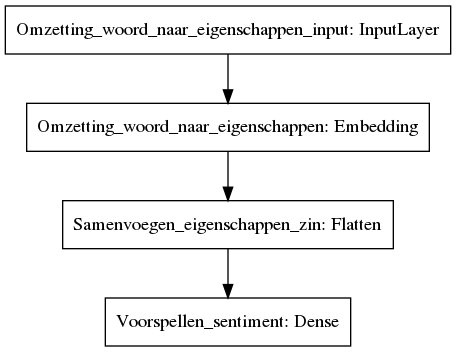

In [18]:
# visual representation of modelplot_model(model, to_file='model_plot.png', show_shapes=False, show_layer_names=True)

<div style='color: #690027;' markdown="1">
<h3>3.3 Training the model</h3></div>

As described above, the layers form a review step by step into a sentiment value. However, at this moment, our model has no idea how to perform this conversion. Like a human, the algorithm learns by seeing examples of positively and negatively labeled reviews. Based on these examples, the algorithm learns more. Similarly, as with humans, it is necessary to repeat this learning process several times to learn to see more and more patterns in the examples.
The learning process specifically proceeds more or less as follows:<ol>
<li>Take the text of a review.</li><li>Enter the text as input to the algorithm.</li><li>Let the algorithm make a prediction of the sentiment. (In the beginning the algorithm doesn't have any knowledge yet so it will choose a number of random properties at each layer and guess the sentiment based on that.)        <ul>
<li>If the algorithm guesses correctly, it will remember the properties it had chosen in the different layers, so that it will make similar choices next time.</li><li>If the algorithm guesses wrong, then it forgets the properties it had chosen in the different layers, so that they have less chance of being chosen in the future.</li>        </ul>
    </li>
<li>As long as there are still reviews that you have not taken as input, you take the text from another review and go back to step 2.</li></ol>

These steps are usually repeated several times in order to achieve an even better result. When training the algorithm, you will repeat these steps 5 times. You will notice that this does not go quickly, the computer must after all show all 50000 reviews to the model to let it learn further.

In [19]:
# Train the model to choose the features that best predict sentiment.train_model(model, X_train, y_train, X_test, y_test)

Epoch 1/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5137 - accuracy: 0.7318 - val_loss: 0.3398 - val_accuracy: 0.8528
Epoch 2/5
1250/1250 [==============================] - 9s 8ms/step - loss: 0.2382 - accuracy: 0.9066 - val_loss: 0.3560 - val_accuracy: 0.8470
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0875 - accuracy: 0.9841 - val_loss: 0.4132 - val_accuracy: 0.8416
Epoch 4/5
1250/1250 [==============================] - 9s 8ms/step - loss: 0.0225 - accuracy: 0.9992 - val_loss: 0.4724 - val_accuracy: 0.8417
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0079 - accuracy: 0.9998 - val_loss: 0.5278 - val_accuracy: 0.8437


You can see that the algorithm has an <em>val_accuracy</em> of about 0.84. This means that it can correctly predict the sentiment of 84% of the reviews. This also means that it will make an incorrect prediction for 16% of the reviews.

<div style='color: #690027;' markdown="1">
<h3>3.4 Using the model</h3></div>

Now that the model has learned to predict the sentiment of reviews, you can use it to predict the sentiment of a random review. Below you will see recent reviews that have been picked from rottentomatoes.com. After cleaning up the review, you can let the algorithm make a prediction for it.

In [20]:
review_godzilla_vs_kong = "Godzilla vs. Kong spends more time with King Kong on his journey to Hollow Earth. King Kong in the Antarctic snow is a beautiful sight, and there are other fun images in Hollow Earth. This is the third movie that minimises Godzilla though. It was the whole gimmick of the 2014 Godzilla to hide him, and King of the Monsters sidelined him too. In his story, King Kong has a relationship with Jia (Kaylee Hottle) who communicates with him through sign language. Their relationship is aiming for a Spielbergian child and creature feel. It may be missing a few beats but it’s sincere."review_godizlla_vs_kong = prepare_for_prediction(review_godzilla_vs_kong, maximum_sentence_length)prediction = model.predict(review_godizlla_vs_kong)[0, 0]
print(f"The predicted polarity of the review is {prediction * 2 - 1}.")
if prediction > 0.55:    print("The review is positive.")elif prediction < 0.45:print("The review is negative.")else:print("The review is neutral.")

De voorspelde polariteit van de review is 0.963327169418335
De review is positief.


Note that the algorithm gives a value between 0 and 1. This value is converted to a sentiment value between -1 and 1 by the code `prediction * 2 - 1`.

In [21]:
review_cherry = "But perhaps Cherry’s most baffling choice is to have both a voiceover narration and direct fourth wall breaks with Holland directly addressing the viewer. There’s no consistency on why it chooses one over the other at any given time and it never justifies why it’s doing either. All that serves to drag down a movie that feels like it’ll never end."review_cherry = prepare_for_prediction(review_cherry, maximum_sentence_length)prediction = model.predict(review_cherry)[0, 0]
print(f"The predicted polarity of the review is {prediction*2 - 1}.")
if prediction > 0.55:print("The review is positive.")elif prediction < 0.45:print("The review is negative.")else:print("The review is neutral.")

De voorspelde polariteit van de review is -0.9256005883216858
De review is negatief.


### Assignment- Go search for a review on the internet (for instance, on www.rottentomatoes.com).- Paste the text here in the string named `eigen_review`.- Check if the model can correctly predict the sentiment of the review. Remember that the algorithm only uses the first 100 words of the review. So, you might only be able to give part of a review as input.

In [26]:
eigen_review = ""own_review = prepare_for_prediction(own_review, maximum_sentence_length)prediction = model.predict(own_review)[0, 0]
print(f"The predicted polarity of the review is {prediction*2 - 1}.")
if prediction > 0.55:print("The review is positive.")elif prediction < 0.45:print("The review is negative.")else:print("The review is neutral.")

De voorspelde polariteit van de review is 0.020172119140625
De review is neutraal.


### Reference List

[1] Kaggle. IMDB Dataset of 50K Movie Reviews Dataset. https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

<img src="images/cclic.png" alt="Banner" align="left" style="width:100px;"/><br><br>
Notebook Chatbot, see <a href="http://www.aiopschool.be">AI At School</a>, by T. Neutens, F. wyffels, & N. Gesquière is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International license</a>.